# clone Dataset from github

In [1]:
! git clone https://github.com/akramtahmasebi/EFS-DNN_data.git

Cloning into 'EFS-DNN_data'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 17 (delta 5), reused 15 (delta 3), pack-reused 0
Unpacking objects: 100% (17/17), done.


# import library & and python pkg

In [2]:
import numpy as np , pandas as pd 
import matplotlib.pyplot as plt , seaborn as sns 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.losses import categorical_crossentropy

import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')
%matplotlib inline

# preprocess Data 

In [3]:
manula_args = 2 # if you want categorize between 0 and 1  use int 2 and for categorize with attac_type use int 5

df = pd.read_csv('EFS-DNN_data/v2_kdd99_raw.csv')

features = df.iloc[:, :-1]
target = df.iloc[:, -1]

numerical_features = [x for x in features.columns if features[x].dtype == np.int64 or features[x].dtype == np.float64]
categorical_features = [x for x in features.columns if features[x].dtype == object]

lbe = LabelEncoder()
for feat in categorical_features:
    df[feat] = lbe.fit_transform(df[feat])

mms = MinMaxScaler()
df[numerical_features] = mms.fit_transform(df[numerical_features])

if manula_args == 2:
    mask = target == 'normal'
    target[mask] = 0
    target[~mask] = 1
elif manula_args == 5:
    attack_type = pd.read_csv('EFS-DNN_data/attack_type.csv')
    attack2type = dict()
    for attack, type in attack_type.values:
        attack2type[attack] = type
    type2idx = {'normal': 0, 'dos': 1, 'probe': 2, 'r2l': 3, 'u2r': 4}
    df.iloc[:, -1] = target.apply(lambda x: type2idx[attack2type[x]])

df.to_csv('v2_pre.csv', index=False)

In [5]:
x,y = df.iloc[:, :-1] , df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [6]:
myModel = Sequential()
myModel.add(Dense(30,activation='relu',input_shape=(41,)))
myModel.add(Dropout(0.1))
myModel.add(Dense(20,activation='relu'))
myModel.add(Dropout(0.1))
myModel.add(Dense(10,activation='relu'))
myModel.add(Dropout(0.1))
myModel.add(Dense(5,activation='relu'))
myModel.add(Dense(2,activation='softmax'))

In [7]:
myModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                1260      
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                 5

In [8]:
myModel.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=.001),
    loss=categorical_crossentropy,
    metrics=['accuracy']
)

In [9]:
network_history = myModel.fit(
    X_train,y_train,
    batch_size=1024,
    epochs=50,
    shuffle=True,
    validation_data=(X_test, y_test)
)

Epoch 1/50
100/100 [==============================] - 5s 13ms/step - loss: 0.5810 - accuracy: 0.6931 - val_loss: 0.2378 - val_accuracy: 0.9254
Epoch 2/50
100/100 [==============================] - 0s 5ms/step - loss: 0.2587 - accuracy: 0.9042 - val_loss: 0.1254 - val_accuracy: 0.9624
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.1466 - accuracy: 0.9565 - val_loss: 0.0898 - val_accuracy: 0.9726
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.1039 - accuracy: 0.9699 - val_loss: 0.0684 - val_accuracy: 0.9789
Epoch 5/50
100/100 [==============================] - 0s 5ms/step - loss: 0.0823 - accuracy: 0.9764 - val_loss: 0.0565 - val_accuracy: 0.9827
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0700 - accuracy: 0.9800 - val_loss: 0.0510 - val_accuracy: 0.9838
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0619 - accuracy: 0.9823 - val_loss: 0.0462 - val_accuracy: 0.9859
Epoch

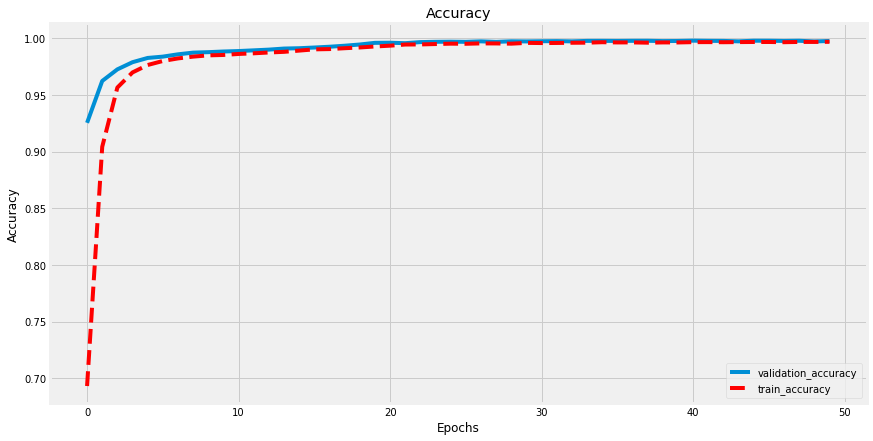

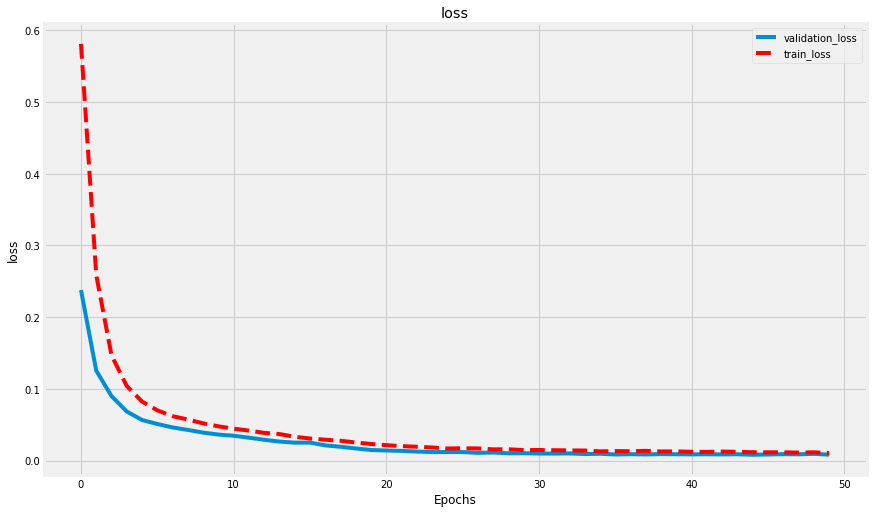

In [10]:
plt.figure(figsize=(12,6))
plt.plot(network_history.history['val_accuracy'])
plt.plot(network_history.history['accuracy'],'--r')
plt.legend(['validation_accuracy', 'train_accuracy'])
plt.title('Accuracy')
plt.tight_layout()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()



plt.figure(figsize=(12,7))
plt.plot(network_history.history['val_loss'])
plt.plot(network_history.history['loss'],'--r')
plt.legend(['validation_loss', 'train_loss'])
plt.title('loss')
plt.tight_layout()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()